<a href="https://colab.research.google.com/github/karthik40121/OIB-SIP/blob/main/PROJECT_4_PROPOSAL_LEVEL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
sns.set(style="whitegrid")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Twitter_Data.csv to Twitter_Data.csv


In [ ]:
df = pd.read_csv("Twitter_Data.csv")
print("Shape:", df.shape)
df.head()


Shape: (162980, 2)


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
print(df.columns)


Index(['clean_text', 'category'], dtype='object')


In [ ]:
TEXT_COL = "clean_text"    # change if needed
TARGET_COL = "category"   # change if needed

df = df[[TEXT_COL, TARGET_COL]].dropna()
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


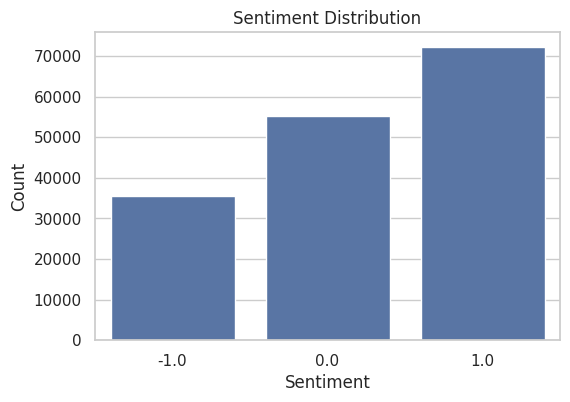

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=TARGET_COL, data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", " ", text)  # URLs
    text = re.sub(r"@\w+", " ", text)
    text = re.sub(r"#\w+", " ", text)                    # hashtags
    text = re.sub(r"[^a-z\s]", " ", text)                # keep only letters
    text = re.sub(r"\s+", " ", text).strip()             # extra spaces
    return text

df["cleaned"] = df[TEXT_COL].apply(clean_text)
df[["cleaned", TARGET_COL]].head()


,cleaned,category
0,when modi promised minimum government maximum ...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp to...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
X = df["cleaned"]
y = df[TARGET_COL]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 130375
Test size: 32594


In [ ]:
tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),     # unigrams + bigrams
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape


((130375, 10000), (32594, 10000))

In [ ]:
svm_clf = LinearSVC()
svm_clf.fit(X_train_tfidf, y_train)

svm_pred = svm_clf.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.8651285512671044
              precision    recall  f1-score   support

        -1.0       0.86      0.77      0.81      7102
         0.0       0.82      0.95      0.88     11042
         1.0       0.91      0.84      0.88     14450

    accuracy                           0.87     32594
   macro avg       0.86      0.86      0.86     32594
weighted avg       0.87      0.87      0.86     32594



In [ ]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)

nb_pred = nb_clf.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.7187519175308339
              precision    recall  f1-score   support

        -1.0       0.81      0.49      0.61      7102
         0.0       0.78      0.67      0.72     11042
         1.0       0.67      0.87      0.76     14450

    accuracy                           0.72     32594
   macro avg       0.75      0.68      0.69     32594
weighted avg       0.74      0.72      0.71     32594



In [ ]:
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train_tfidf, y_train)

log_pred = log_clf.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))


Logistic Regression Accuracy: 0.8559857642510892
              precision    recall  f1-score   support

        -1.0       0.86      0.74      0.80      7102
         0.0       0.81      0.95      0.87     11042
         1.0       0.90      0.84      0.87     14450

    accuracy                           0.86     32594
   macro avg       0.86      0.84      0.85     32594
weighted avg       0.86      0.86      0.85     32594



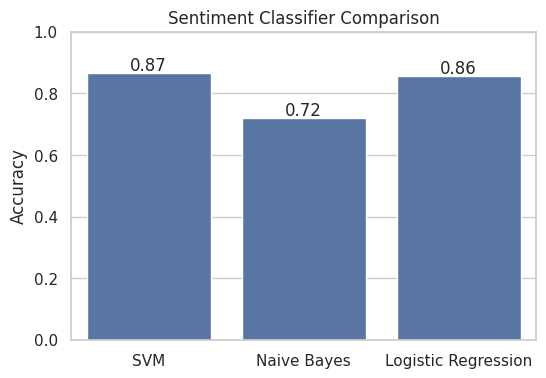

In [ ]:
models = ["SVM", "Naive Bayes", "Logistic Regression"]
accuracies = [
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, log_pred)
]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies)
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Sentiment Classifier Comparison")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()


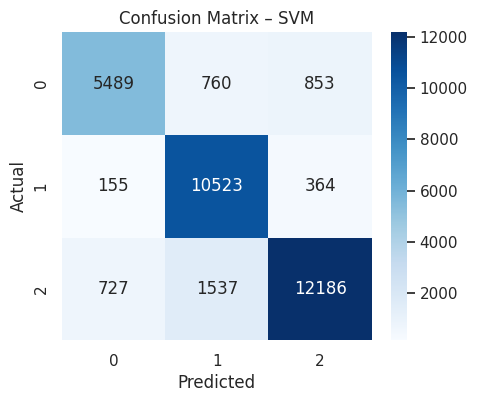

In [ ]:
cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – SVM")
plt.show()


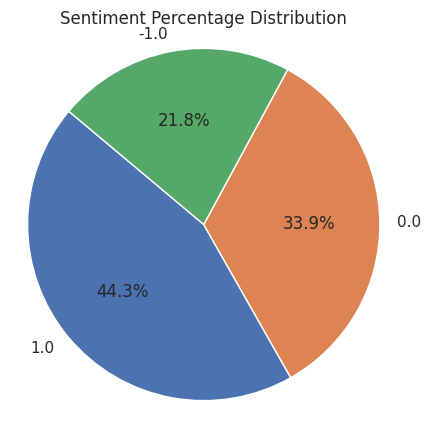

In [ ]:
sent_counts = df[TARGET_COL].value_counts(normalize=True) * 100

plt.figure(figsize=(5,5))
plt.pie(sent_counts, labels=sent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Sentiment Percentage Distribution")
plt.axis('equal')
plt.show()


DATA LINK 2

In [ ]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving apps.csv to apps (1).csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving user_reviews.csv to user_reviews (1).csv


In [ ]:
apps = pd.read_csv("apps.csv")
reviews = pd.read_csv("user_reviews.csv")

print("Apps shape:", apps.shape)
print("Reviews shape:", reviews.shape)

apps.head(), reviews.head()


Apps shape: (9659, 14)
Reviews shape: (64295, 5)


(   Unnamed: 0                                                App  \
 0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
 1           1                                Coloring book moana   
 2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
 3           3                              Sketch - Draw & Paint   
 4           4              Pixel Draw - Number Art Coloring Book   
 
          Category  Rating  Reviews  Size     Installs  Type Price  \
 0  ART_AND_DESIGN     4.1      159   19M      10,000+  Free     0   
 1  ART_AND_DESIGN     3.9      967   14M     500,000+  Free     0   
 2  ART_AND_DESIGN     4.7    87510  8.7M   5,000,000+  Free     0   
 3  ART_AND_DESIGN     4.5   215644   25M  50,000,000+  Free     0   
 4  ART_AND_DESIGN     4.3      967  2.8M     100,000+  Free     0   
 
   Content Rating                     Genres      Last Updated  \
 0       Everyone               Art & Design   January 7, 2018   
 1       Everyone  Art & Desig

In [ ]:
apps_clean = apps[[
    "App", "Category", "Rating", "Reviews",
    "Installs", "Type", "Price"
]].drop_duplicates(subset="App")

apps_clean.head()


,App,Category,Rating,Reviews,Installs,Type,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0


In [ ]:
apps_clean["Installs"] = (
    apps_clean["Installs"]
    .str.replace("+", "", regex=False)
    .str.replace(",", "", regex=False)
)

apps_clean["Installs"] = pd.to_numeric(apps_clean["Installs"], errors="coerce")
apps_clean["Price"] = (
    apps_clean["Price"]
    .str.replace("$", "", regex=False)
    .astype(float)
)

apps_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   App       9659 non-null   object 
 1   Category  9659 non-null   object 
 2   Rating    8196 non-null   float64
 3   Reviews   9659 non-null   int64  
 4   Installs  9659 non-null   int64  
 5   Type      9658 non-null   object 
 6   Price     9659 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 528.4+ KB


In [ ]:
df_reviews = reviews[[
    "App", "Translated_Review", "Sentiment"
]].dropna()

df_reviews.head()


,App,Translated_Review,Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive
3,10 Best Foods for You,Works great especially going grocery store,Positive
4,10 Best Foods for You,Best idea us,Positive
5,10 Best Foods for You,Best way,Positive


In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df_reviews["cleaned_review"] = df_reviews["Translated_Review"].apply(clean_text)


In [ ]:
merged_df = pd.merge(
    df_reviews,
    apps_clean,
    on="App",
    how="inner"
)

print("Merged shape:", merged_df.shape)
merged_df.head()


Merged shape: (35929, 10)


,App,Translated_Review,Sentiment,cleaned_review,Category,Rating,Reviews,Installs,Type,Price
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,i like eat delicious food that s i m cooking f...,HEALTH_AND_FITNESS,4.0,2490,500000,Free,0.0
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,this help eating healthy exercise regular basis,HEALTH_AND_FITNESS,4.0,2490,500000,Free,0.0
2,10 Best Foods for You,Works great especially going grocery store,Positive,works great especially going grocery store,HEALTH_AND_FITNESS,4.0,2490,500000,Free,0.0
3,10 Best Foods for You,Best idea us,Positive,best idea us,HEALTH_AND_FITNESS,4.0,2490,500000,Free,0.0
4,10 Best Foods for You,Best way,Positive,best way,HEALTH_AND_FITNESS,4.0,2490,500000,Free,0.0


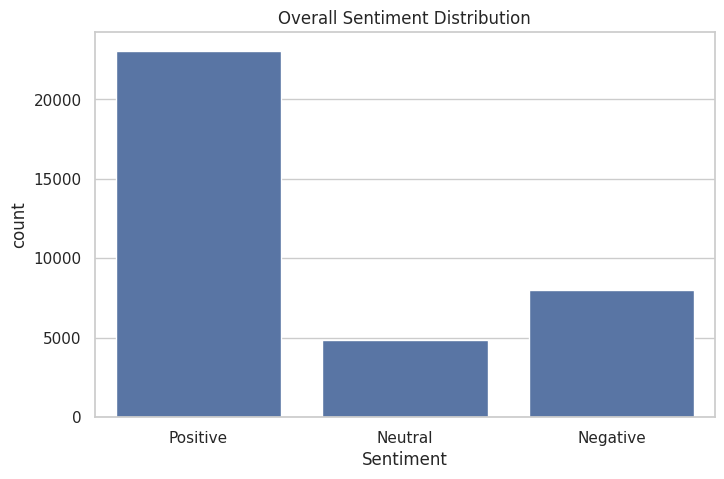

In [ ]:
sns.countplot(x="Sentiment", data=merged_df)
plt.title("Overall Sentiment Distribution")
plt.show()


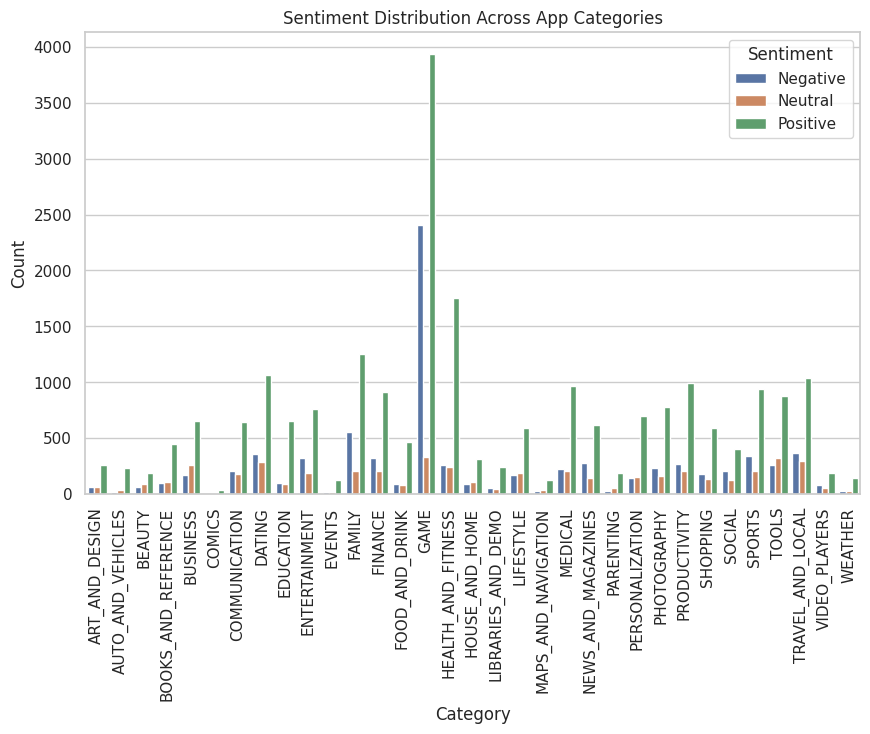

In [ ]:
category_sentiment = (
    merged_df.groupby(["Category", "Sentiment"])
    .size()
    .reset_index(name="Count")
)

plt.figure(figsize=(10,6))
sns.barplot(
    x="Category",
    y="Count",
    hue="Sentiment",
    data=category_sentiment
)
plt.xticks(rotation=90)
plt.title("Sentiment Distribution Across App Categories")
plt.show()


In [ ]:
X = merged_df["cleaned_review"]
y = merged_df["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(
    max_features=12000,
    ngram_range=(1,2),
    stop_words="english"
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

svm_pred = svm.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Accuracy: 0.9021708878374617
              precision    recall  f1-score   support

    Negative       0.88      0.83      0.85      1601
     Neutral       0.82      0.81      0.82       970
    Positive       0.93      0.95      0.94      4615

    accuracy                           0.90      7186
   macro avg       0.88      0.86      0.87      7186
weighted avg       0.90      0.90      0.90      7186



In [ ]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

nb_pred = nb.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.7425549679933203
              precision    recall  f1-score   support

    Negative       0.89      0.44      0.59      1601
     Neutral       0.90      0.08      0.14       970
    Positive       0.72      0.99      0.83      4615

    accuracy                           0.74      7186
   macro avg       0.84      0.50      0.52      7186
weighted avg       0.78      0.74      0.69      7186



In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

lr_pred = lr.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.8902031728360701
              precision    recall  f1-score   support

    Negative       0.90      0.79      0.84      1601
     Neutral       0.84      0.73      0.78       970
    Positive       0.90      0.96      0.93      4615

    accuracy                           0.89      7186
   macro avg       0.88      0.83      0.85      7186
weighted avg       0.89      0.89      0.89      7186



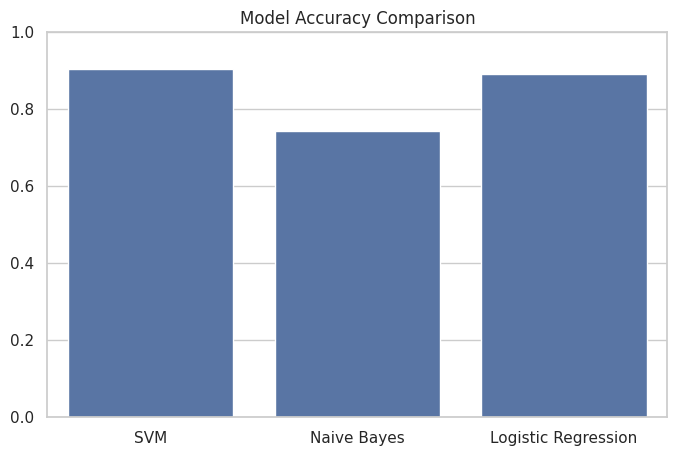

In [ ]:
models = ["SVM", "Naive Bayes", "Logistic Regression"]
accuracies = [
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, lr_pred)
]

sns.barplot(x=models, y=accuracies)
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.show()


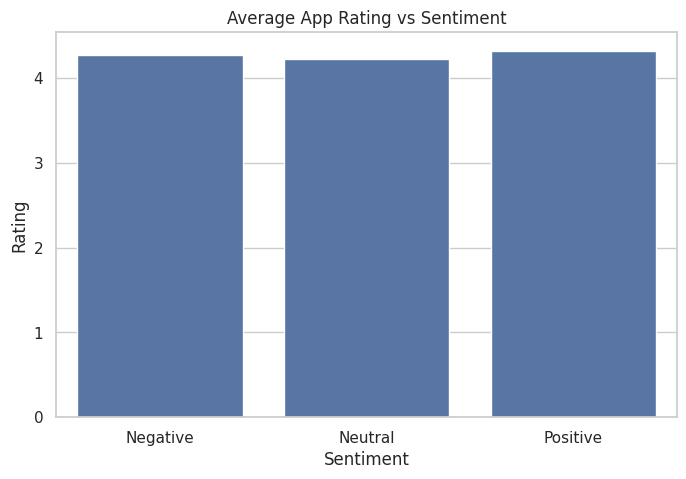

In [ ]:
rating_sentiment = (
    merged_df.groupby("Sentiment")["Rating"]
    .mean()
    .reset_index()
)

sns.barplot(x="Sentiment", y="Rating", data=rating_sentiment)
plt.title("Average App Rating vs Sentiment")
plt.show()
